In [64]:
import country_converter as coco
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

SHAPEFILE = './worldmap/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']

# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

# Print the map
# geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [65]:
# Next, we need to ensure that our data matches with the country codes. 
iso3_codes = geo_df['country'].to_list()

# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list

# Drop countries for which the converter could not find a country code. 
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

geo_df

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


,country,country_code,geometry,iso2_code
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",MY
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",CL
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",BO
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",PE
...,...,...,...,...
246,Palau,PLW,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...",PW
247,Guam,GUM,"POLYGON ((144.88640 13.64020, 144.89666 13.617...",GU
248,Northern Mariana Islands,MNP,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",MP
249,Bahrain,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26...",BH


In [66]:
# import dataset to use for map visualization
cl_real_happiness = pd.read_csv('./data/cl_real_happiness.csv')

# Convert USA to US in order to allow for merge
def us_convert(value):
  if value == 'United States of America':
    value = 'United States'
    return value
  else:
    return value

geo_df['country'] = geo_df['country'].map(us_convert)

geo_df[geo_df['country'].str.contains('United States')]

,country,country_code,geometry,iso2_code
154,United States,USA,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532...",US
204,United States Minor Outlying Islands,UMI,"MULTIPOLYGON (((-169.53026 16.76020, -169.5208...",UM
208,United States Virgin Islands,VIR,"MULTIPOLYGON (((-64.55940 17.75161, -64.58519 ...",VI


In [67]:
# functions to convert row strings to enable merging

def congo_convert1(value):
  if value == 'Democratic Republic of the Congo':
    value = 'Congo (Kinshasa)'
    return value
  else:
    return value

def congo_convert2(value):
  if value == 'Republic of the Congo':
    value = 'Congo (Brazzaville)'
    return value
  else:
    return value

def tanzania_convert(value):
  if value == 'United Republic of Tanzania':
    value = 'Tanzania'
    return value
  else:
    return value

geo_df['country'] = geo_df['country'].map(congo_convert1)
geo_df['country'] = geo_df['country'].map(congo_convert2)

print(geo_df[geo_df['country'].str.contains('Congo')])

geo_df['country'] = geo_df['country'].map(tanzania_convert)

print(geo_df[geo_df['country'].str.contains('Tanzania')])
print(geo_df[geo_df['country'].str.contains('Angola')])
print(cl_real_happiness[cl_real_happiness['country'].str.contains('Angola')])

                country country_code  \
30  Congo (Brazzaville)          COG   
31     Congo (Kinshasa)          COD   

                                             geometry iso2_code  
30  POLYGON ((18.62639 3.47687, 18.63455 3.44922, ...        CG  
31  MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...        CD  
     country country_code                                           geometry  \
18  Tanzania          TZA  MULTIPOLYGON (((32.92086 -9.40790, 32.90546 -9...   

   iso2_code  
18        TZ  
    country country_code                                           geometry  \
101  Angola          AGO  MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...   

    iso2_code  
101        AO  
        city country  price_per_sq_meter (city)  Ladder score (country)  \
3725  Luanda  Angola                    5421.61                     NaN   

      Logged GDP per capita (country)  Social support (country)  \
3725                              NaN                       NaN   

      Healthy

In [79]:
# Merge the two dataframes
# merged_geo_df = pd.merge(left = cl_real_happiness, right = geo_df)

price_sq_meter = merged_geo_df[['city','country', 'price_per_sq_meter (city)', 'country_code', 'geometry', 'iso2_code']]
avg_price_country = price_sq_meter.groupby(['country']).mean('price_per_sq_meter (city)')
# country	Healthy life expectancy (country)	country_code	geometry	iso2_code
avg_price_country.rename({"price_per_sq_meter (city)":"price_per_sq_meter"}, axis = 1, inplace=True)

In [80]:
country_geoms = price_sq_meter[['country', 'geometry']].drop_duplicates()

In [81]:
avg_price_country_geoms = pd.merge(avg_price_country, country_geoms, how="inner", on="country") 
avg_price_country_geoms = avg_price_country_geoms[~avg_price_country_geoms['country'].isin(['Niger', 'Somalia', 'Solomon Islands', 'Monaco', 'Burundi'])]
avg_price_country_geoms.sort_values("price_per_sq_meter", ascending=False)

,country,price_per_sq_meter,geometry
148,Singapore,20752.740000,"POLYGON ((103.96079 1.39110, 103.98569 1.38544..."
59,Gabon,13654.610000,"MULTIPOLYGON (((13.29457 2.16106, 13.29488 2.1..."
162,Switzerland,12781.841667,"POLYGON ((10.45381 46.86443, 10.44854 46.83223..."
184,Zambia,10763.910000,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629..."
102,Malawi,10507.210000,"MULTIPOLYGON (((34.96461 -11.57356, 34.65125 -..."
...,...,...,...
89,Kosovo,NaN,"POLYGON ((20.06496 42.54676, 20.07705 42.55991..."
95,Lesotho,NaN,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908..."
105,Mali,NaN,"POLYGON ((-12.26413 14.77494, -12.24679 14.767..."
116,Myanmar,NaN,"MULTIPOLYGON (((92.57588 21.97757, 92.58384 21..."


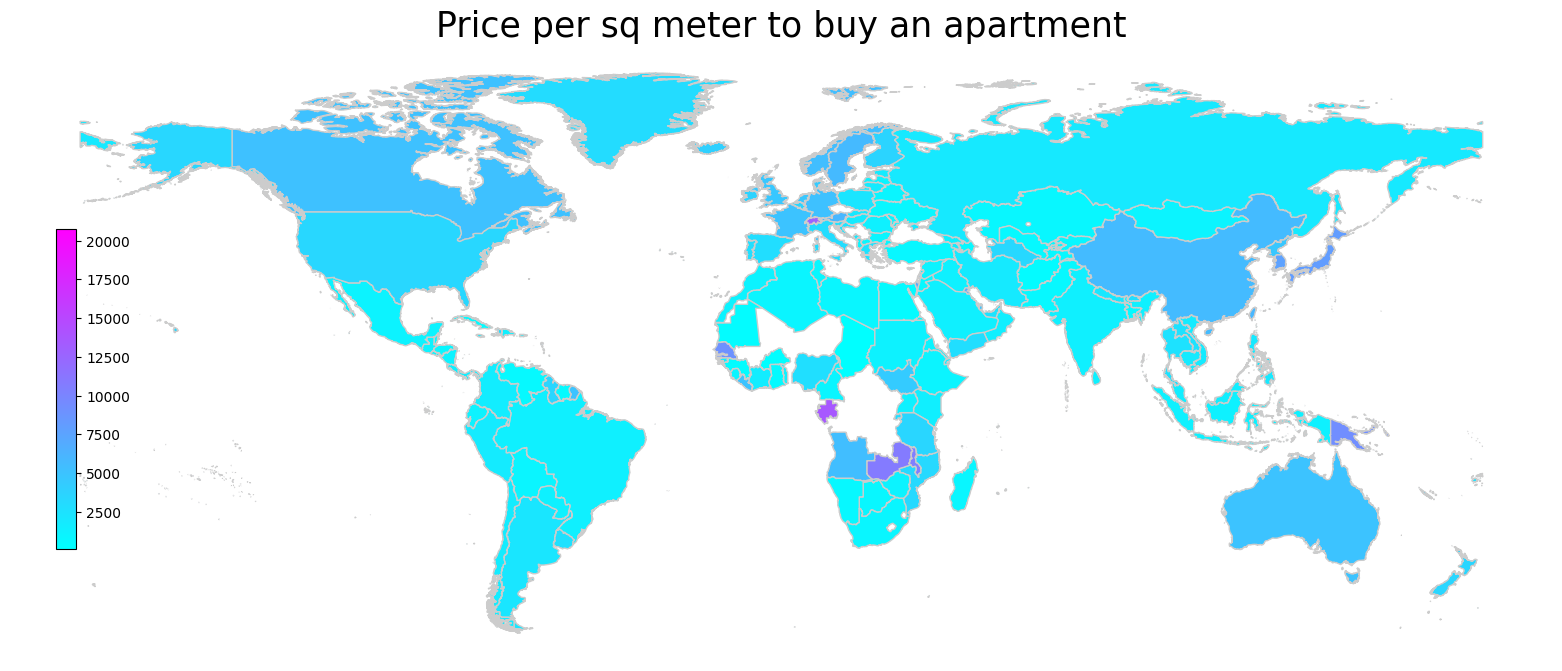

In [82]:
from geopandas import GeoDataFrame
# convert to geodata frame
df = GeoDataFrame(avg_price_country_geoms)

title = 'Price per sq meter to buy an apartment'
source = 'Cost of Living Data Set'
col = 'price_per_sq_meter'
# source = 'Source: relataly.com \nGrowth Rate = New cases / All previous cases'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'cool'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
# ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In [83]:
avg_price_country_geoms.sort_values('price_per_sq_meter', ascending=False).head(50) 

,country,price_per_sq_meter,geometry
148,Singapore,20752.740000,"POLYGON ((103.96079 1.39110, 103.98569 1.38544..."
59,Gabon,13654.610000,"MULTIPOLYGON (((13.29457 2.16106, 13.29488 2.1..."
162,Switzerland,12781.841667,"POLYGON ((10.45381 46.86443, 10.44854 46.83223..."
184,Zambia,10763.910000,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629..."
102,Malawi,10507.210000,"MULTIPOLYGON (((34.96461 -11.57356, 34.65125 -..."
18,Bermuda,10381.960000,"MULTIPOLYGON (((-64.67610 32.38866, -64.64763 ..."
100,Luxembourg,9742.326667,"POLYGON ((6.11749 50.12046, 6.11056 50.10599, ..."
131,Papua New Guinea,9246.090000,"MULTIPOLYGON (((140.97446 -2.60052, 140.98732 ..."
145,Senegal,9016.380000,"POLYGON ((-12.26413 14.77494, -12.25651 14.745..."
58,French Polynesia,8830.390000,"MULTIPOLYGON (((-136.16576 -22.02435, -136.175..."


In [85]:
merged_geo_df_complete = pd.read_csv("data/merged_geo_df_complete.csv", index_col=0)

In [101]:
type(merged_geo_df.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [97]:
type(merged_geo_df_complete.geometry[0])

str

In [102]:
gpd.GeoSeries.from_wkt(merged_geo_df_complete.geometry)

0       MULTIPOLYGON (((-122.75302 48.99251, -122.6532...
1       MULTIPOLYGON (((-122.75302 48.99251, -122.6532...
2       MULTIPOLYGON (((-122.75302 48.99251, -122.6532...
3       MULTIPOLYGON (((-122.75302 48.99251, -122.6532...
4       MULTIPOLYGON (((-122.75302 48.99251, -122.6532...
                              ...                        
5000    MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...
5001    MULTIPOLYGON (((92.57588 21.97757, 92.58384 21...
5002    MULTIPOLYGON (((43.78875 -12.30804, 43.79705 -...
5003    POLYGON ((28.98085 -28.90904, 28.99542 -28.908...
5004    POLYGON ((22.86106 10.91915, 22.86323 10.89182...
Length: 5005, dtype: geometry